#Gaussian Smoothing 高斯平滑化示例

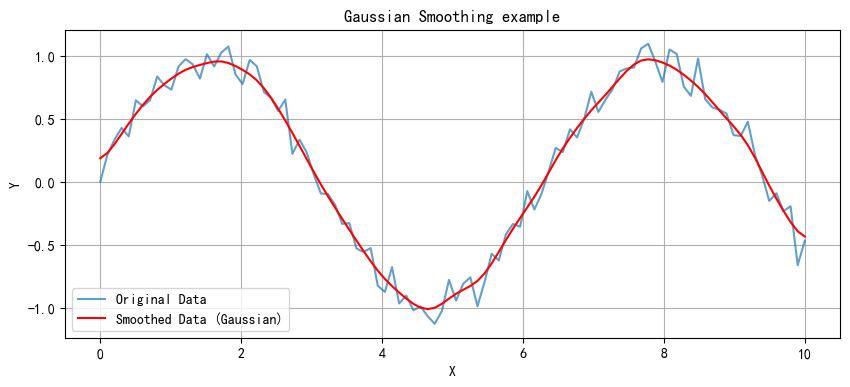

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, size=x.shape[0])

sigma = 2  
smoothed_y = gaussian_filter1d(y, sigma)

plt.figure(figsize=(10, 4))
plt.plot(x, y, label='Original Data',alpha=0.7)
plt.plot(x, smoothed_y, label='Smoothed Data (Gaussian)',color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Smoothing example')
plt.legend()
plt.grid(True)
plt.show()

#Running Average 平滑化示例#1

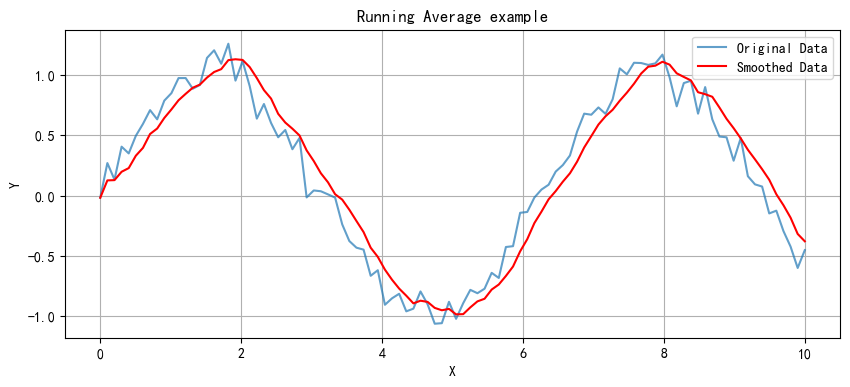

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def running_average(data, window_size):
    smoothed_data = []
    for i in range(len(data)):
        start = max(0, i - window_size + 1)
        end = i + 1
        window = data[start:end]
        smoothed_value = sum(window) / len(window)
        smoothed_data.append(smoothed_value)
    return smoothed_data

x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, size=x.shape[0])  

window_size = 5
smoothed_y = running_average(y, window_size)

plt.figure(figsize=(10, 4))
plt.plot(x, y, label='Original Data', alpha=0.7)
plt.plot(x, smoothed_y, label='Smoothed Data', color='red')
plt.title('Running Average example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

#Running Average 平滑化示例#2

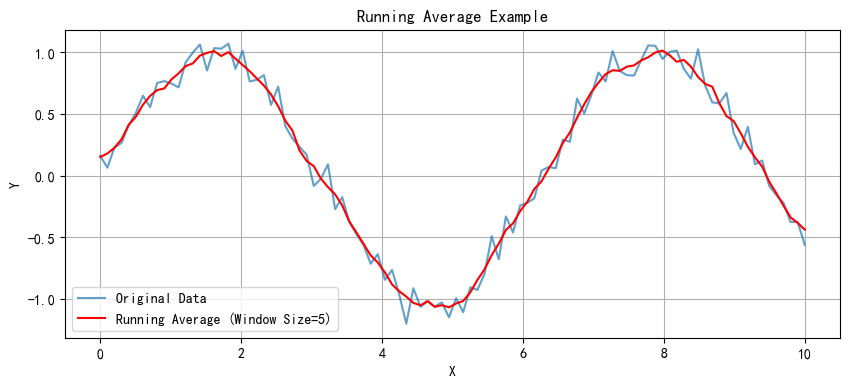

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def running_average(data, window_size):
    smoothed_data = []
    for i in range(len(data)):
        start_index = max(0, i - window_size // 2)
        end_index = min(len(data), i + window_size // 2 + 1)
        window_data = data[start_index:end_index]
        smoothed_value = np.mean(window_data)
        smoothed_data.append(smoothed_value)
    return smoothed_data

x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, size=x.shape[0])  
window_size = 5  

smoothed_y = running_average(y, window_size)

plt.figure(figsize=(10, 4))
plt.plot(x, y, label='Original Data', alpha=0.7)
plt.plot(x, smoothed_y, label=f'Running Average (Window Size={window_size})', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Running Average Example')
plt.legend()
plt.grid(True)
plt.show()

#TEMA 平滑化示例#1

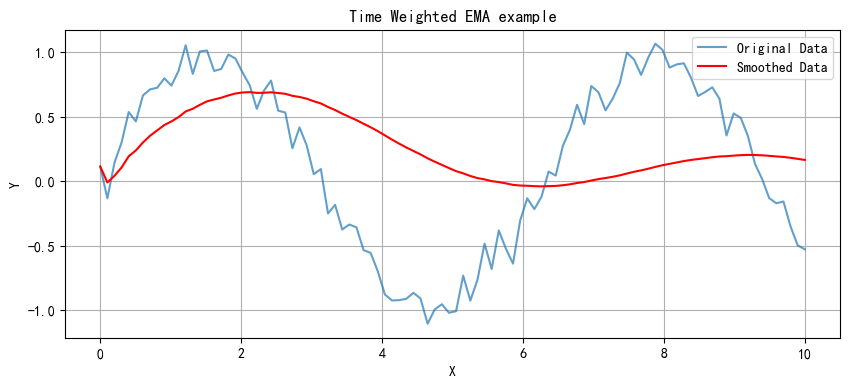

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def smooth_data(y_values, x_values, smoothing_param, range_of_x, viewport_scale):
    smoothing_weight = min(np.sqrt(smoothing_param or 0), 0.999)
    last_y = 0
    debias_weight = 0
    smoothed_data = []

    for index, y_point in enumerate(y_values):
        prev_x = index - 1 if index > 0 else 0
        change_in_x = ((x_values[index] - x_values[prev_x]) / range_of_x) * viewport_scale
        smoothing_weight_adj = smoothing_weight ** change_in_x

        last_y = last_y * smoothing_weight_adj + y_point
        debias_weight = debias_weight * smoothing_weight_adj + 1
        smoothed_data.append(last_y / debias_weight)

    return smoothed_data

x_values = np.linspace(0, 10, 100)
y_values = np.sin(x_values) + np.random.normal(0, 0.1, size=x_values.shape[0]) 
smoothing_param = 0.5
range_of_x = 10
viewport_scale = 1

smoothed_y = smooth_data(y_values, x_values, smoothing_param, range_of_x, viewport_scale)

plt.figure(figsize=(10, 4))
plt.plot(x_values, y_values, label='Original Data', alpha=0.7)
plt.plot(x_values, smoothed_y, label='Smoothed Data', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Time Weighted EMA example #1')
plt.legend()
plt.grid(True)
plt.show()

#TEMA 平滑化示例#2

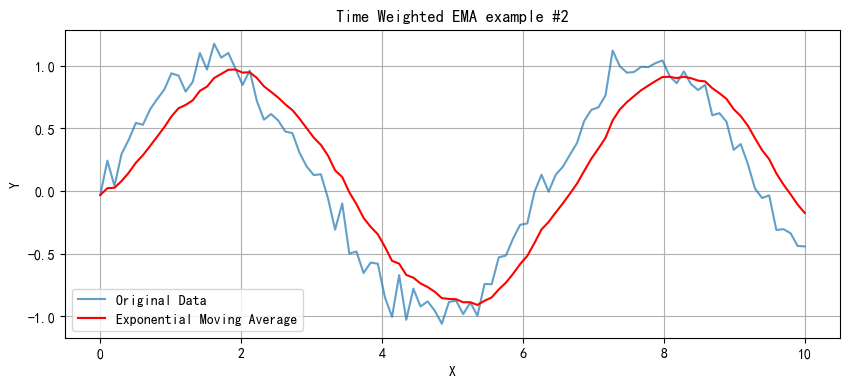

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_moving_average(data, alpha):
    ema = [data[0]]  
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])  
    return ema

x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, size=x.shape[0])  
alpha = 0.2  

ema = exponential_moving_average(y, alpha)

plt.figure(figsize=(10, 4))
plt.plot(x, y, label='Original Data', alpha=0.7)
plt.plot(x, ema, label='Exponential Moving Average', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Time Weighted EMA example #2')
plt.legend()
plt.grid(True)
plt.show()